In [1]:
import contextily
import geopandas
import rioxarray
import seaborn
import pandas
import numpy
import matplotlib.pyplot as plt
from shapely.geometry import Polygon


In [2]:
gdf = geopandas.read_file(r'/Users/dhruvpandit/Documents/GitHub/ISEG_AEF/Spatial Econometrics/Spatial Econometrics 23/Assignment_01/politics.shp')

In [3]:
# select columns that are not strings
numeric_cols = gdf.select_dtypes(exclude=['object'])

print(numeric_cols.columns)


Index(['POLY_ID', 'PPindex202', 'Mhousesqm', 'M0_14', 'M15_24', 'M25_64',
       'M65', 'F0_14', 'F15_24', 'F25_64', 'F65', 'TOTALPOP', 'year', 'Voters',
       'Votepct', 'BE', 'CDSPP', 'CH', 'IL', 'L', 'PAN', 'PCPPEV', 'PPDPSD',
       'PS', 'OBN', 'DVotepct', 'DOBN', 'geometry'],
      dtype='object')


• PPindex2020 – Purchasing Power Index (Portugal = 100)
• Mhousesqm – Median house prices per square meter
• M0_14 – male population between 0 and 14 years
• M15_24 – male population between 15 and 24 years
• M25_64 – male population between 25 and 64 years
• M65 – male population with 65 years or higher
• F0_14 – female population between 0 and 14 years
• F15_24 – female population between 15 and 24 years
• F25_64 – female population between 25 and 64 years
• F65 – female population with 65 years or higher
• TOTALPOP – Total population

• Voters – Total number of voters
• Votepct – Voters Percentage (participation rate)
• party percentages for 10 political parties. 
• DVotepct – change in Voters Percentage from previous national elections (change in
participation)
• DOBN – change in OBN % from from previous national elections

In [5]:
gdf_pca = gdf[['PPindex202', 'Mhousesqm', 'M0_14', 'M15_24', 'M25_64',
       'M65', 'F0_14', 'F15_24', 'F25_64', 'F65', 'TOTALPOP', 'Voters',
       'Votepct', 'BE', 'CDSPP', 'CH', 'IL', 'L', 'PAN', 'PCPPEV', 'PPDPSD',
       'PS', 'DVotepct', 'DOBN']]

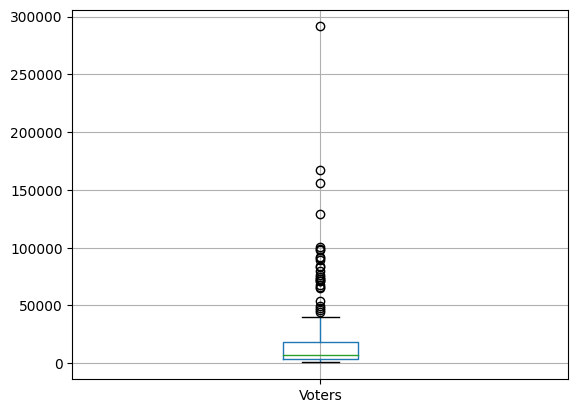

In [10]:
gdf.boxplot(column = 'Voters')
plt.show()

In [25]:
gdf_pca.fillna(0, inplace = True)

/var/folders/6c/vby383sn3xlg0j_c253f0sf40000gn/T/ipykernel_91063/4058948534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pca.fillna(0, inplace = True)


In [27]:
# Import the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(gdf_pca)

pca = PCA(n_components=15)
principal_components = pca.fit_transform(scaled_data)

print(pca.explained_variance_ratio_)

[0.53785005 0.16166263 0.06959337 0.04856546 0.04122471 0.03215552
 0.02418244 0.01927625 0.01771133 0.01410522 0.01196379 0.00888966
 0.00628051 0.00409454 0.00163952]


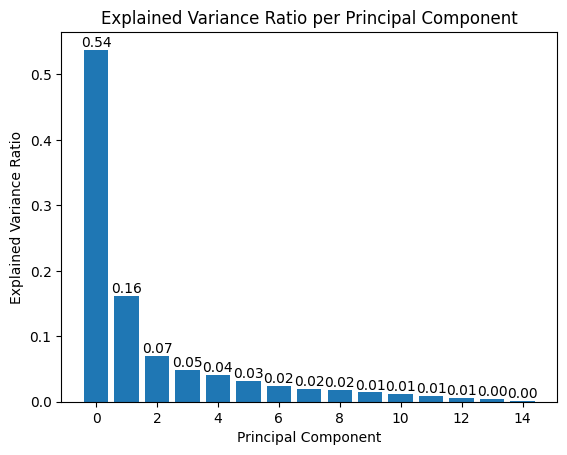

In [30]:

# Create a bar plot of the explained variance ratio
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

# Add labels and title
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')

for i, ratio in enumerate(pca.explained_variance_ratio_):
    plt.annotate(f'{ratio:.2f}', xy=(i, ratio), ha='center', va='bottom')

# Show the plot
plt.show()



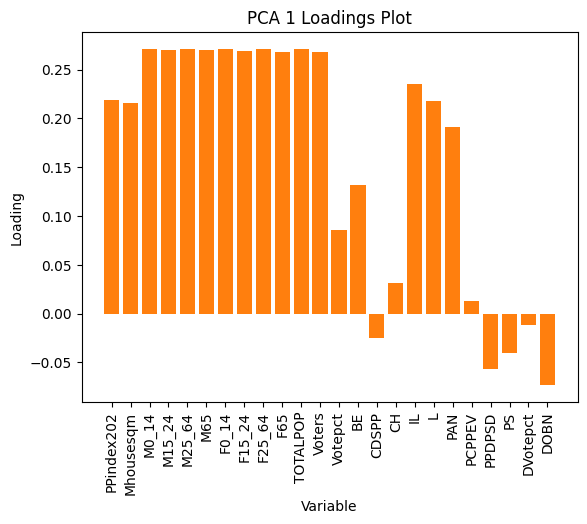

In [32]:
import matplotlib.pyplot as plt

# assuming pca is your fitted PCA object
loadings = pca.components_[0]

# create a bar plot of the loadings
plt.bar(range(len(loadings)), loadings)

# set the x-axis tick labels to be the variable names
plt.xticks(range(len(loadings)), gdf_pca.columns.values, rotation=90)

# add axis labels and title
plt.xlabel('Variable')
plt.ylabel('Loading')
plt.title('PCA 1 Loadings Plot')

# show the plot
plt.show()


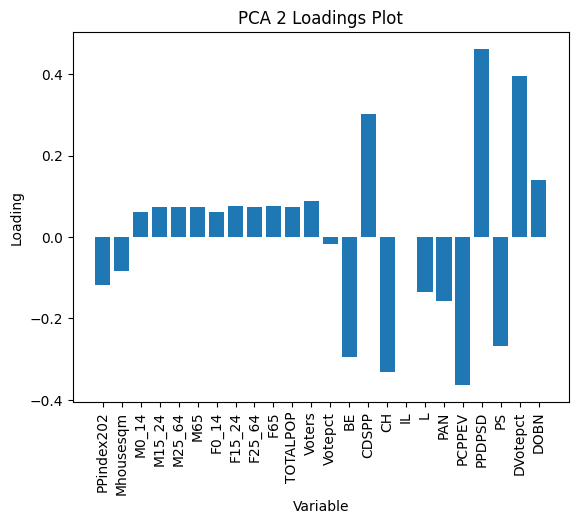

In [33]:
import matplotlib.pyplot as plt

# assuming pca is your fitted PCA object
loadings = pca.components_[1]

# create a bar plot of the loadings
plt.bar(range(len(loadings)), loadings)

# set the x-axis tick labels to be the variable names
plt.xticks(range(len(loadings)), gdf_pca.columns.values, rotation=90)

# add axis labels and title
plt.xlabel('Variable')
plt.ylabel('Loading')
plt.title('PCA 2 Loadings Plot')

# show the plot
plt.show()


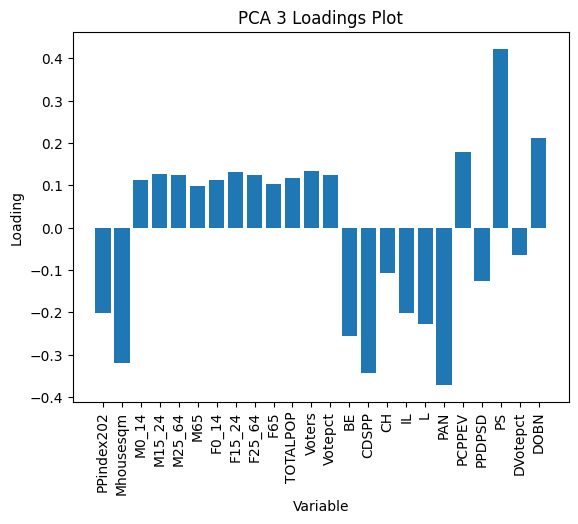

In [34]:
import matplotlib.pyplot as plt

# assuming pca is your fitted PCA object
loadings = pca.components_[2]

# create a bar plot of the loadings
plt.bar(range(len(loadings)), loadings)

# set the x-axis tick labels to be the variable names
plt.xticks(range(len(loadings)), gdf_pca.columns.values, rotation=90)

# add axis labels and title
plt.xlabel('Variable')
plt.ylabel('Loading')
plt.title('PCA 3 Loadings Plot')

# show the plot
plt.show()


In [107]:
from sklearn.cluster import KMeans

# Select the columns you want to use for clustering


# Create a k-means object with the desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the k-means object to the data
kmeans.fit(gdf_pca)

# Get the cluster labels for each data point
labels = kmeans.predict(gdf_pca)

# Add the cluster labels to the original dataframe
gdf_pca['cluster'] = labels


/var/folders/6c/vby383sn3xlg0j_c253f0sf40000gn/T/ipykernel_77878/3909170792.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_pca['cluster'] = labels


In [108]:
gdf_transfo['cluster'] = labels

/opt/homebrew/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<AxesSubplot: >

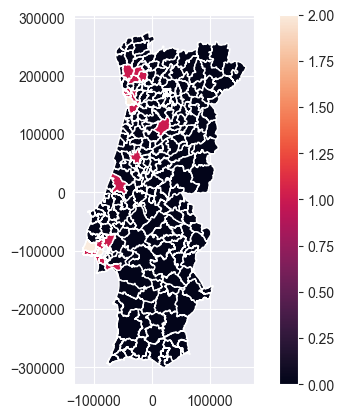

In [111]:
gdf_transfo.plot('cluster', legend = True)

<AxesSubplot: >

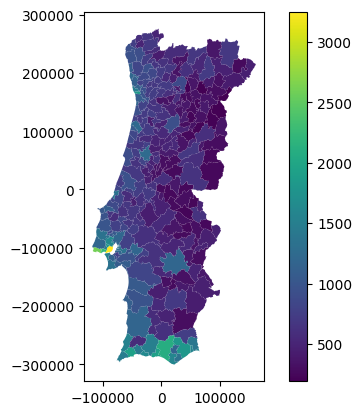

In [59]:
gdf.plot('Mhousesqm', legend = True)

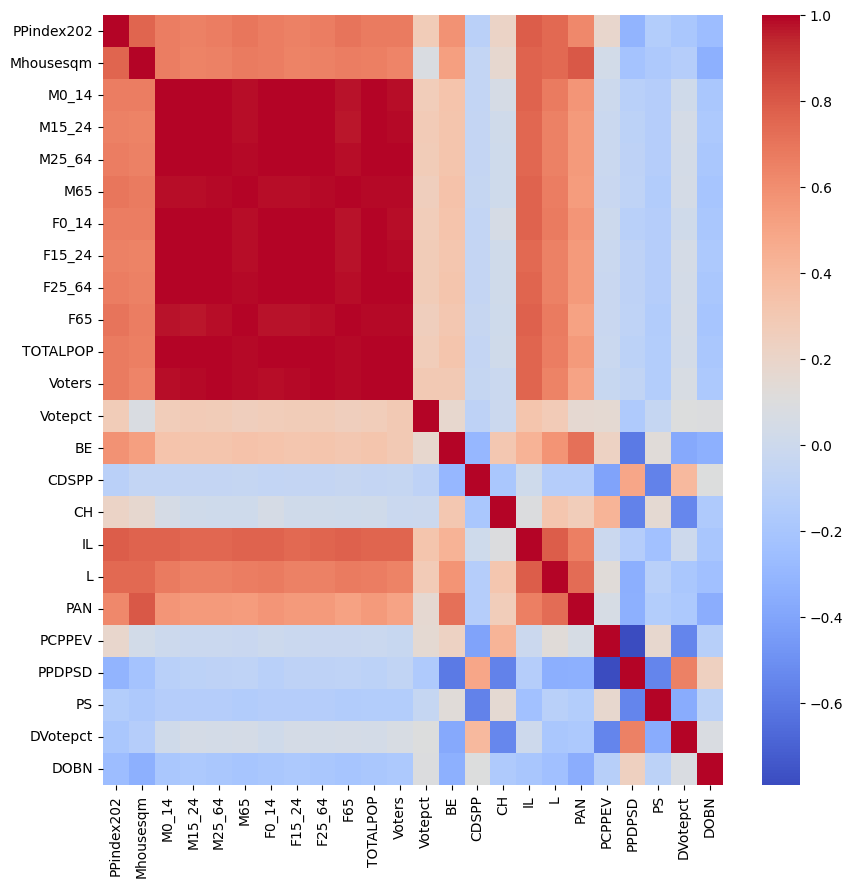

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a correlation matrix for a pandas dataframe
corr_matrix = gdf_pca.corr()

# set figure size
fig, ax = plt.subplots(figsize=(10, 10))

# create heatmap using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm', ax=ax)

# show plot
plt.show()


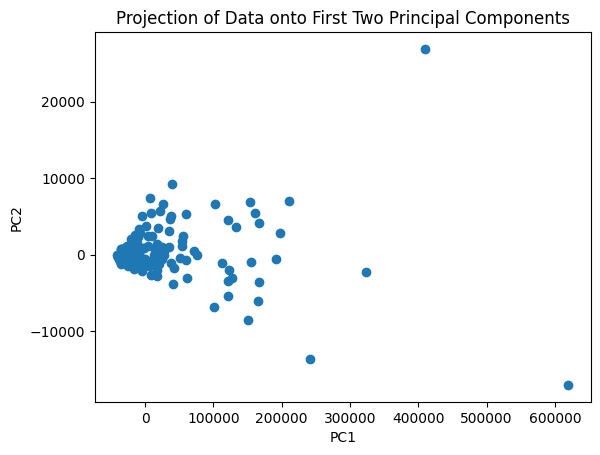

In [36]:

# Fit and transform your data into the new coordinate system
X_pca = pca.fit_transform(gdf_pca)

# Plot the transformed data
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Data onto First Two Principal Components')
plt.show()
